In [1]:
# Importing cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import gamma as Gamma

-----------------------------

# Physical Models of Living Systems

#### *Rafaele Gaudio 2057974*

-----------------------------

## Week 1: - Deadline 19 October 

1) Solve the Quasi Stationary Approximation of the Consumer Resource Model with 1 species and 1 abiotic resource and compare it numerically with the full solution. Optional: find a regime of parameters where the QSA is good. Remember to check that parameters you choose and initial condition for R and N should be so that R* in the QSA is not negative.

2) Write the Fokker Plank Equation associated to the stochastic logistic equation with environmental noise and Solve the stationary solution P*. 
Optional: compare analytical and numerical simulation of the SDE.

-----------------------------



## 1. CRM with abiotic resources 
### 1.1. Full dynamics
The consumer resource model for abiotic resources is given by:

$$
\begin{cases}
\frac{dR}{dt}=\mu(R)-cRN_t \quad ; \quad \mu(R)=\frac{\mu_{max} R}{k_s + R} \\
\frac{dN}{dt}=(\gamma cR_t-d)N
\end{cases}
$$

where $N(t)$ represent the species, $R(t)$ represent the resources and $\mu(R)$ is the so called monod function.

$γ$ is the yield coefficient and provides the number of units of nutrients that are consumed to produce a bacterial cell instead.

$μ_{max}$ is the optimized growth rate.

$k_s$ is the saturation constant.
 
$d$ is the death rate.


In [2]:
# Params

time_period=500
time_unit=1

mu_max=10
ks=10

gamma=0.5
c=0.5
d=0.2

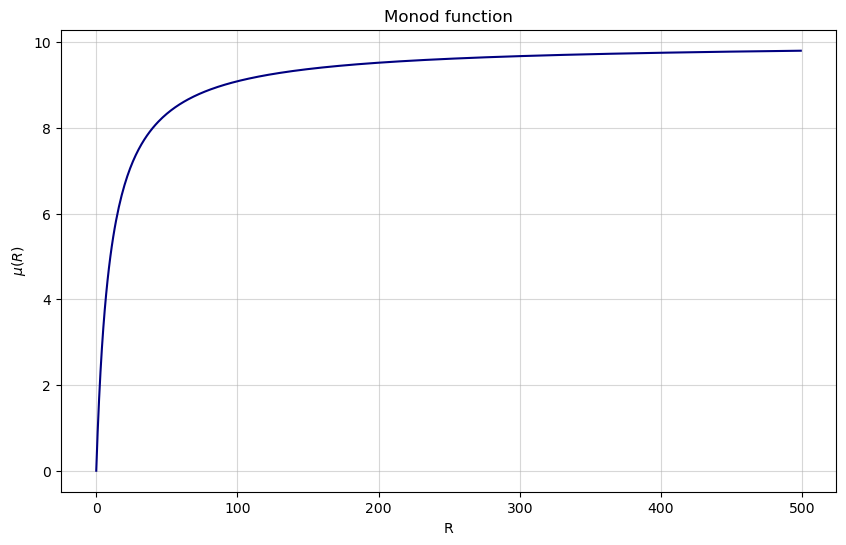

In [3]:
# Monod Function

R=np.arange(0,time_period,time_unit)
monod_function=(mu_max*R)/(ks + R)

fig, ax = plt.subplots(figsize=(10,6))
ax.set(xlabel="R", ylabel="$\mu (R)$", title="Monod function")
ax.plot(R, monod_function, color="navy")
ax.grid(alpha=0.5)


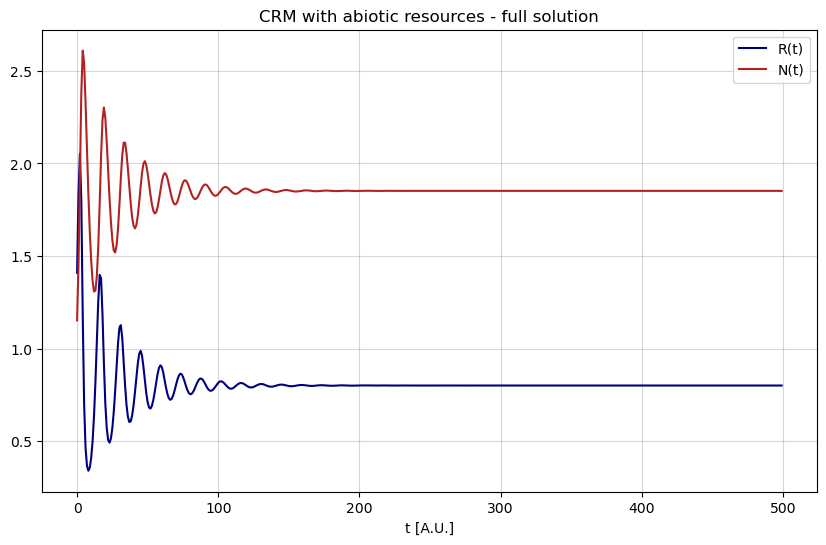

In [4]:
# Full dynamics simulation

def N_step(N_t, delta_t, gamma, c, R_t_step, d):
    return N_t*(delta_t*(gamma*c*R_t_step - d) + 1)

def R_step(R_t, delta_t, mu_max, ks, c, N_t):
    return R_t*(delta_t*(mu_max/(ks+R_t) - c*N_t) + 1)

N0 = 1
R0 = 10

N_full = np.ones(time_period)
R_full = np.ones(time_period)

N_full[0] = N0
R_full[0] = R0

for i in range(time_period):
    R_full[i] = R_step(R_full[i-1], time_unit, mu_max, ks, c, N_full[i-1])
    N_full[i] = N_step(N_full[i-1], time_unit, gamma, c, R_full[i], d)

fig, ax = plt.subplots(figsize=(10,6))
ax.set(xlabel="t [A.U.]", ylabel="", title="CRM with abiotic resources - full solution")
ax.plot(range(time_period), R_full, label='R(t)',color="navy")
ax.plot(range(time_period), N_full, label='N(t)',color="firebrick")
ax.legend();
ax.grid(alpha=0.5)

### 1.2. Quasi-stationary approximation

For the quasi-stationary approximation we have:
$$
\left[\mu(R)-cRN_t \right]_{R(t)=R^*}=0
$$

so our model holds:
$$
\begin{cases}
R^*=\frac{\mu_{max}}{cN_t}-k_s\\
\frac{dN}{dt}=(\gamma cR^*-d)N
\end{cases}
$$

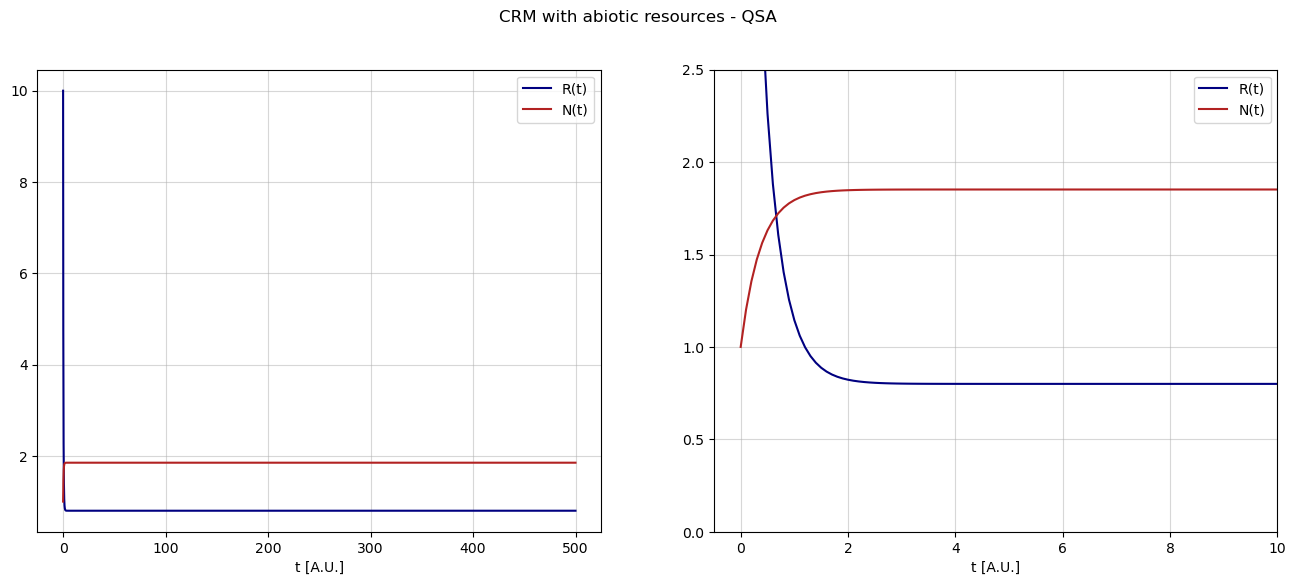

In [5]:
# QSA dynamics

def CRM_abiotic_QSA(N,t,gamma,c,d,mu_max,ks):
    R_star=mu_max/(c*N)-ks
    dNdt=(gamma*c*R_star-d)*N
    return(dNdt)

t=np.arange(0,time_period,0.1)

N=odeint(CRM_abiotic_QSA,N0,t,args=(gamma,c,d,mu_max,ks))
R=mu_max/(c*N)-ks

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
fig.suptitle("CRM with abiotic resources - QSA")

ax1.set(xlabel="t [A.U.]", ylabel="",title="")
ax1.plot(t, R,label="R(t)",color="navy")
ax1.plot(t, N,label="N(t)",color="firebrick")
ax1.legend()
ax1.grid(alpha=0.5)

ax2.set(xlabel="t [A.U.]", ylabel="",title="")
ax2.set_xlim(-0.5,10)
ax2.set_ylim(0,2.5)
ax2.plot(t, R,label="R(t)",color="navy")
ax2.plot(t, N,label="N(t)",color="firebrick")
ax2.legend()
ax2.grid(alpha=0.5)


### 1.3. Comparison between QSA and full dynamics

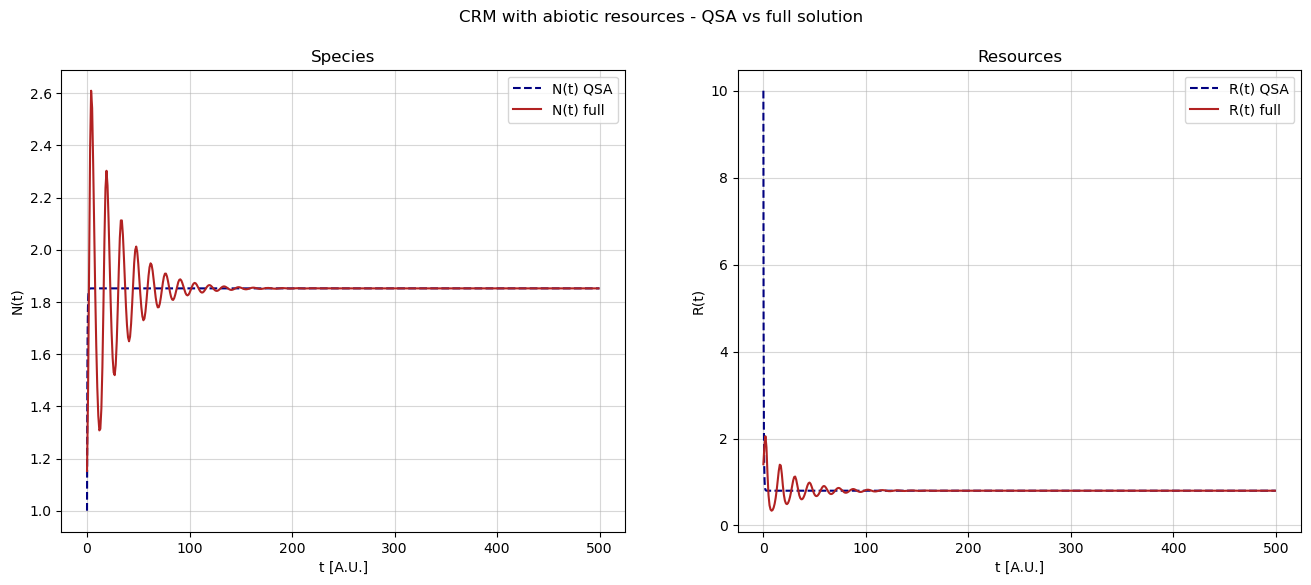

In [6]:
# Comparison between QSA and full dynamics

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
fig.suptitle("CRM with abiotic resources - QSA vs full solution")

ax1.set(xlabel="t [A.U.]", ylabel="N(t)",title="Species")
ax1.plot(t, N, label="N(t) QSA",color="navy",linestyle = "dashed")
ax1.plot(range(time_period), N_full, label='N(t) full',color="firebrick")
ax1.legend()
ax1.grid(alpha=0.5)

ax2.set(xlabel="t [A.U.]", ylabel="R(t)", title="Resources")
ax2.plot(t, R, label="R(t) QSA",color="navy",linestyle = "dashed")
ax2.plot(range(time_period), R_full, label='R(t) full',color="firebrick")
ax2.legend()
ax2.grid(alpha=0.5)

## 2. Stochastic logistic equation with environmental noise

The stochastic logistic equation with environmental noise is given by:
$$
\frac{dx}{dt}=\frac{x}{\tau}\left(1-\frac{x}{K} \right)+\left( \frac{\sigma}{\tau}\right)^{\frac{1}{2}} x \xi (t)
$$
where $x(t)=\frac{n(t)}{N}$ is the fraction of species we are interested to, and $\xi(t)$ is the environmental noise such that $\langle\xi(t)\rangle=0$ and $\langle\xi(t)\xi(t')\rangle=\sigma^2\delta(t-t')$.

The Fokker-Planck equation associated to the SDE is:
$$
\partial_t P(x)=\partial_x \left[ -\frac{x}{\tau}\left(1-\frac{x}{K} \right)P(x)+\frac{1}{2}\partial_x \left[ \frac{\sigma}{\tau}x^2 P(x)\right] \right]
$$

### 2.1. Quasi-stationary approximation

For the quasi-stationary approximation we have that:
$$
\partial_x \left[ -\frac{x}{\tau}\left(1-\frac{x}{K} \right)P(x)+\frac{1}{2}\partial_x \left[ \frac{\sigma}{\tau}x^2 P(x)\right] \right]=0
$$

Let's call:
$$
J(x)=\left[ -\frac{x}{\tau}\left(1-\frac{x}{K} \right)P(x)+\frac{1}{2}\partial_x \left[ \frac{\sigma}{\tau}x^2 P(x)\right] \right]
$$

so the QSA implies that:
$$
\partial_x J(x)=0 \rightarrow J(x)=\text{const}
$$

This condition holds if:
$$
\left[ \partial_x P(x)=\frac{2}{\sigma x}\left( \frac{-x+K(1-\sigma)}{K} \right)P(x) \right]_{P(x)=P^*}
$$

so we obtain that:
$$
P^*(x) \propto e^{-\frac{2x}{\sigma K}} x^{\frac{2(1-\sigma)}{\sigma}}
$$

The QSA for the Fokker-Planck produces a Gamma distribution.


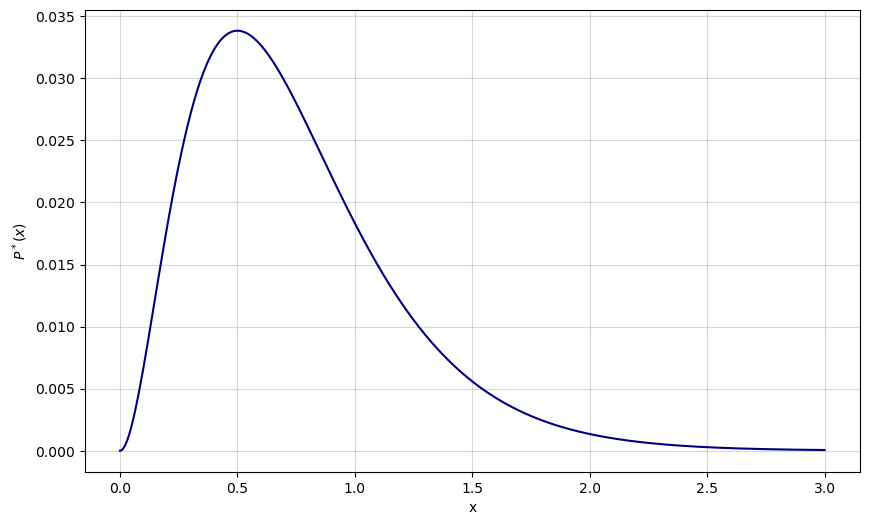

In [7]:
def P_star(x,sigma,K):
    return(np.exp((-2*x)/(sigma*K))*x**((2*(1-sigma))/sigma))

x=np.arange(0,3,0.001)
K=1
sigma=0.5

P=P_star(x,sigma,K)

fig, ax = plt.subplots(figsize=(10,6))
ax.set(xlabel="x", ylabel="$P^*(x)$", title="")
ax.plot(x, P, color="navy")
ax.grid(alpha=0.5)

### 2.2. SDE simulation (optional)

In [8]:
# Params

time_period=500
time_unit=0.1

tau=0.5
K=1
sigma=0.001 
x0=0.1

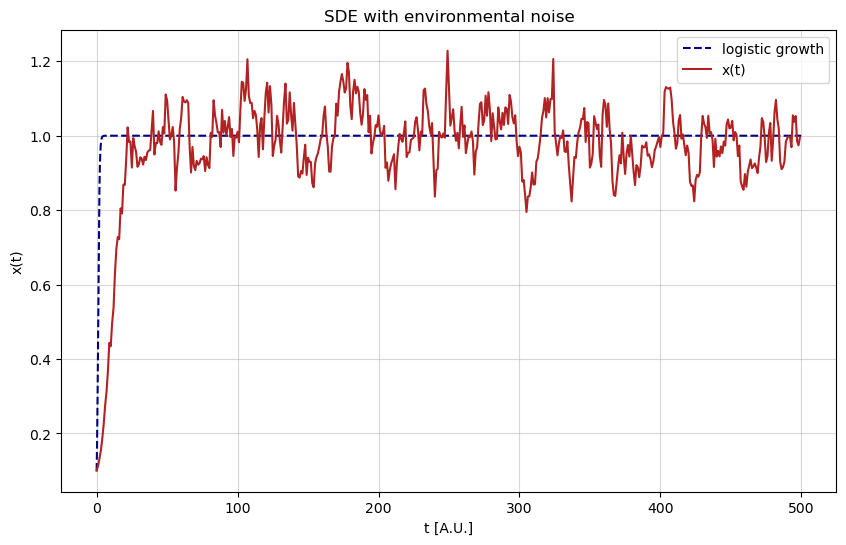

In [9]:
# SDE simulation

def x_step(x_t,delta_t,tau,sigma,K):
    A=1/tau*(1-(x_t/K))
    B=np.sqrt(sigma/tau)*np.random.randn()
    return(x_t*(A*delta_t+B+1))

x_full = np.ones(time_period)
x_full[0] = x0

for i in range(1,time_period):
    x_full[i] = x_step(x_full[i-1], time_unit, tau,sigma,K)

def logistic_growth(x,t,tau,K):
    dxdt=(x/tau)*(1-x/K)
    return(dxdt)

t=np.arange(0,time_period,time_unit)
X0=0.1

X=odeint(logistic_growth,X0,t,args=(tau,K))

   
fig, ax = plt.subplots(figsize=(10,6))
ax.set(xlabel="t [A.U.]", ylabel="x(t)",title="SDE with environmental noise")
ax.plot(t, X,color="navy",linestyle = "dashed",label="logistic growth")
ax.plot(range(time_period), x_full,color="firebrick",label="x(t)")
ax.grid(alpha=0.5)
ax.legend();


mean: 0.9973465602111391
var: 0.0056499869765344966 

-------------------------
Gamma pramas:
-------------------------
alpha: 176.05353168001554
beta: 176.5219219713806
-------------------------


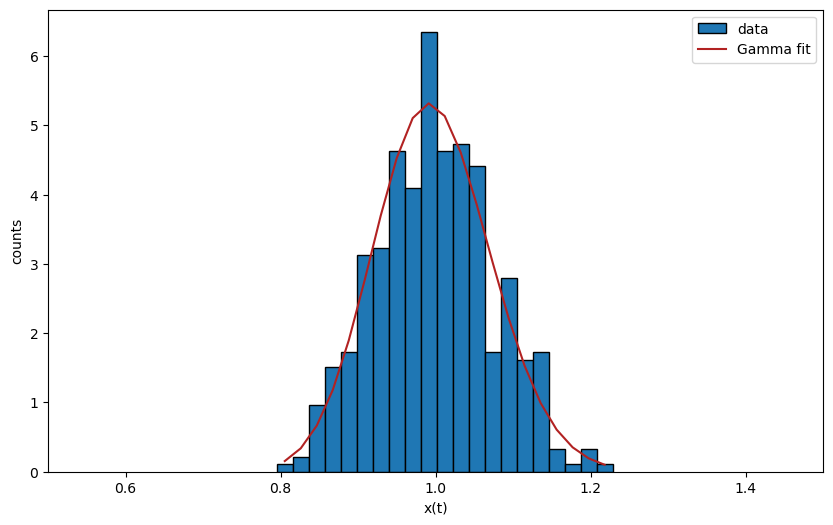

In [10]:
counts=x_full[50:]
bins=int(np.sqrt(len(counts)))

mean=np.mean(counts)
var=np.var(counts)

alpha=mean**2/var
beta=mean/var

_,binEdges=np.histogram(counts,bins=bins)
bincenters=0.5*(binEdges[1:]+binEdges[:-1])

fit=Gamma.pdf(bincenters,alpha,scale=1/beta)

fig,ax  = plt.subplots(figsize=(10,6))
ax.set(xlabel="x(t)",ylabel="counts")
ax.set_xlim(0.5,1.5)
ax.hist(counts,bins=bins,density=True,edgecolor="black",label="data")
ax.plot(bincenters,fit,color="firebrick",label="Gamma fit")
ax.legend();

print("mean:", mean)
print("var:", var,"\n")
print("-------------------------")
print("Gamma pramas:")
print("-------------------------")
print("alpha:",alpha )
print("beta:",beta)
print("-------------------------")